In [4]:
!pip install category_encoders

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data prep
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score


## Business Problem Understanding

### **Problem Statement**

Sebuah perusahaan Bike-Sharing ingin melakukana prediksi jumlah sepeda yang disewa (cnt) menggunakan data historis dari sistem penyewaan sepeda, dengan mempertimbangkan faktor-faktor seperti suhu, musim, kondisi cuaca, dan jam dalam sehari serta mungkin faktor-faktor lain yang mempengaruhi. Prediksi yang akurat akan membantu dalam pengelolaan sumber daya yang lebih baik, mengoptimalkan ketersediaan sepeda, dan meningkatkan efisiensi layanan serta dapat meningkatkan keuntungan.


Sistem Bike Sharing adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, hingga pengembalian sepeda menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari suatu lokasi dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang melibatkan lebih dari 500 ribu sepeda. Sistem ini mendapat perhatian besar saat ini karena perannya yang penting dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dunia nyata yang menarik dari Sistem Bike Sharing, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Tidak seperti layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, lokasi keberangkatan, dan lokasi kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk memantau mobilitas di kota. Oleh karena itu, diharapkan bahwa peristiwa-peristiwa penting di kota dapat terdeteksi dengan memantau data ini.








###**Goals**

1. Mengembangkan model prediksi jumlah penyewaan sepeda (cnt) berdasarkan fitur seperti temp (suhu), season (musim), weathersit (kondisi cuaca), hr (jam) dan beberapa fitur lain yang mungkin mempengaruhi.
2. Hasil Rule-Based Model: Model berbasis aturan (rule-based) telah diterapkan sebagai model baseline dengan hasil sebagai berikut:
  - Mean MAE: 537.61
  - Mean RMSE: 686.08
3. Penghitungan prediksi benefit dari jumlah unit penyewaan sepeda setelah dilakukan Pemodelan Machine Learning, dampak dari kesalahan prediksi terlalu tinggi dapat menyebabkan biaya operasional yang meningkat, sementara prediksi yang terlalu rendah dapat menyebabkan hilangnya pendapatan karena kekurangan stok sepeda.

###**Analytic Approach**
1. Melakukan Data Understanding, Data Cleaning, Exploratory Data Analysis (EDA) untuk memahami pola dalam data, mengidentifikasi hubungan antar variabel, dan mempersiapkan data untuk pemodelan.
2. Mengembangkan model regresi (misalnya Regresi Linear, Decision Tree, Random Forest, XGBoost, dll.) untuk memprediksi cnt (penyewaan sepeda) berdasarkan fitur-fitur yang tersedia.
3. Membandingkan performa model machine learning dengan model rule based untuk melihat peningkatan akurasi prediksi.

### **Metric Evaluation**

**Dalam membuat prediksi ini akan digunakan metric evaluation sebagai berikut:**
1. Mean Absolute Error (MAE): Memberikan rata-rata besar kesalahan prediksi tanpa memperhatikan arah kesalahan. Metrik ini lebih mudah diinterpretasikan dan membantu memahami rata-rata kesalahan per prediksi.
2. Root Mean Squared Error (RMSE): Mengukur deviasi standar dari kesalahan prediksi; cocok untuk kasus di mana kesalahan besar berdampak signifikan. Dalam konteks ini, memastikan ketersediaan sepeda saat dibutuhkan sangat penting, sehingga RMSE relevan.


**Kedua Metric digunakan dengan mempertimbangkan:**

**Alasan Utama:**
1. MAE memberikan ukuran kesalahan rata-rata yang lebih robust terhadap outliers, karena kesalahan absolut tidak dikuadratkan. Ini bisa memberi gambaran tentang kesalahan rata-rata yang terjadi tanpa memberi bobot berlebihan pada outliers.
2. RMSE memberikan penalti lebih besar pada kesalahan besar karena mengkuadratkan selisih antara prediksi dan nilai aktual. Ini berarti RMSE lebih sensitif terhadap outliers dan kesalahan besar dalam prediksi. Jika RMSE jauh lebih besar dari MAE, itu menunjukkan bahwa ada beberapa kesalahan besar dalam prediksi model yang mungkin perlu ditangani atau diperbaiki.


**Manfaat:**

1. MAE mengukur kesalahan rata-rata: MAE memberikan estimasi yang lebih stabil mengenai kesalahan rata-rata secara umum, tanpa memberikan penalti ekstra pada outliers. Ini membantu memahami seberapa baik model menangani kesalahan secara keseluruhan.

2. RMSE mengukur kesalahan besar: Karena mengkuadratkan kesalahan, RMSE menunjukkan seberapa baik model menangani kesalahan besar atau outliers. Dalam bisnis, ini bisa memberi sinyal apakah model cenderung menghasilkan prediksi yang tidak akurat pada beberapa sampel tertentu.


**Kesimpulan:**
MAE bisa menjadi metrik utama untuk mengukur performa umum model, karena mudah diinterpretasikan dalam satuan asli (unit penyewaan sepeda dalam kasus ini) dan
RMSE bisa digunakan untuk mendeteksi apakah ada kesalahan besar yang perlu diperhatikan lebih lanjut.

# Data Understanding

In [6]:
df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


## Penjelasan Setiap Variable (Data Dictionary)

|Variabel | Penjelasan |
|---- | ---- |
| Dteday | Tanggal|
| Season | Musim (1: dingin, 2: semi, 3: panas, 4: gugur)|
| Hr | Jam (0 hingga 23)|
| Holiday | Hari Libur atau Bukan (0: Bukan Hari Libur, 1: Hari Libur)|
| Temp | Suhu ter-normalisasi dalam Celcius. Normalisasi ini mengubah nilai suhu ke dalam skala antara 0 dan 1, dengan 0 mewakili suhu -8°C dan 1 mewakili suhu 39°C. Suhu yang ada di antara -8°C dan 39°C akan dinyatakan sebagai proporsi antara 0 dan 1.|
| Atemp| Suhu rasa ter-normalisasi dalam skala Celsius. Sama seperti suhu, tetapi untuk suhu rasa (yang sering kali dipengaruhi oleh kelembapan, angin, dan faktor lingkungan lainnya). Ini juga mengubah suhu rasa menjadi nilai antara 0 dan 1, dengan 0 mewakili -16°C dan 1 mewakili 50°C.|
| Hum | "Normalized humidity" dengan nilai yang dibagi menjadi 100 (maksimal) berarti bahwa nilai kelembapan telah diubah atau dinormalisasi ke dalam rentang 0 hingga 1. Dalam hal ini, 100 merupakan kelembapan maksimal, dan semua nilai kelembapan lainnya dinyatakan sebagai proporsi terhadap angka maksimal tersebut.|
| Weathersit | Cuaca (1. Cerah, 2. Berawan, 3. Hujan/Salju ringan, 4. Hujan/Salju Deras).|
| Casual | Jumlah pengguna sepeda yang tidak memiliki keanggotaan tetap, atau dengan kata lain, pengguna yang menggunakan layanan berbagi sepeda tanpa berlangganan|
| Registered | Jumlah pengguna yang telah mendaftar sebagai anggota tetap dari layanan berbagi sepeda|
| Cnt | Jumlah total sepeda yang disewa, termasuk pengguna kasual (casual users) maupun pengguna terdaftar (registered users), dihitung dengan menjumlahkan kedua kategori tersebut.|




Mengonversi Kolom Tanggal ke format datetime

In [7]:
# Mengonversi kolom 'tanggal' ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


## Missing Values

In [8]:
# Jumlah data kosong (NaN) untuk setiap variable
df.isnull().sum()

,0
dteday,0
hum,0
weathersit,0
holiday,0
season,0
atemp,0
temp,0
hr,0
casual,0
registered,0


In [9]:
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing

,jumlah
dteday,0
hum,0
weathersit,0
holiday,0
season,0
atemp,0
temp,0
hr,0
casual,0
registered,0


In [10]:
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
dteday,0,0.0
hum,0,0.0
weathersit,0,0.0
holiday,0,0.0
season,0,0.0
atemp,0,0.0
temp,0,0.0
hr,0,0.0
casual,0,0.0
registered,0,0.0


<Axes: >

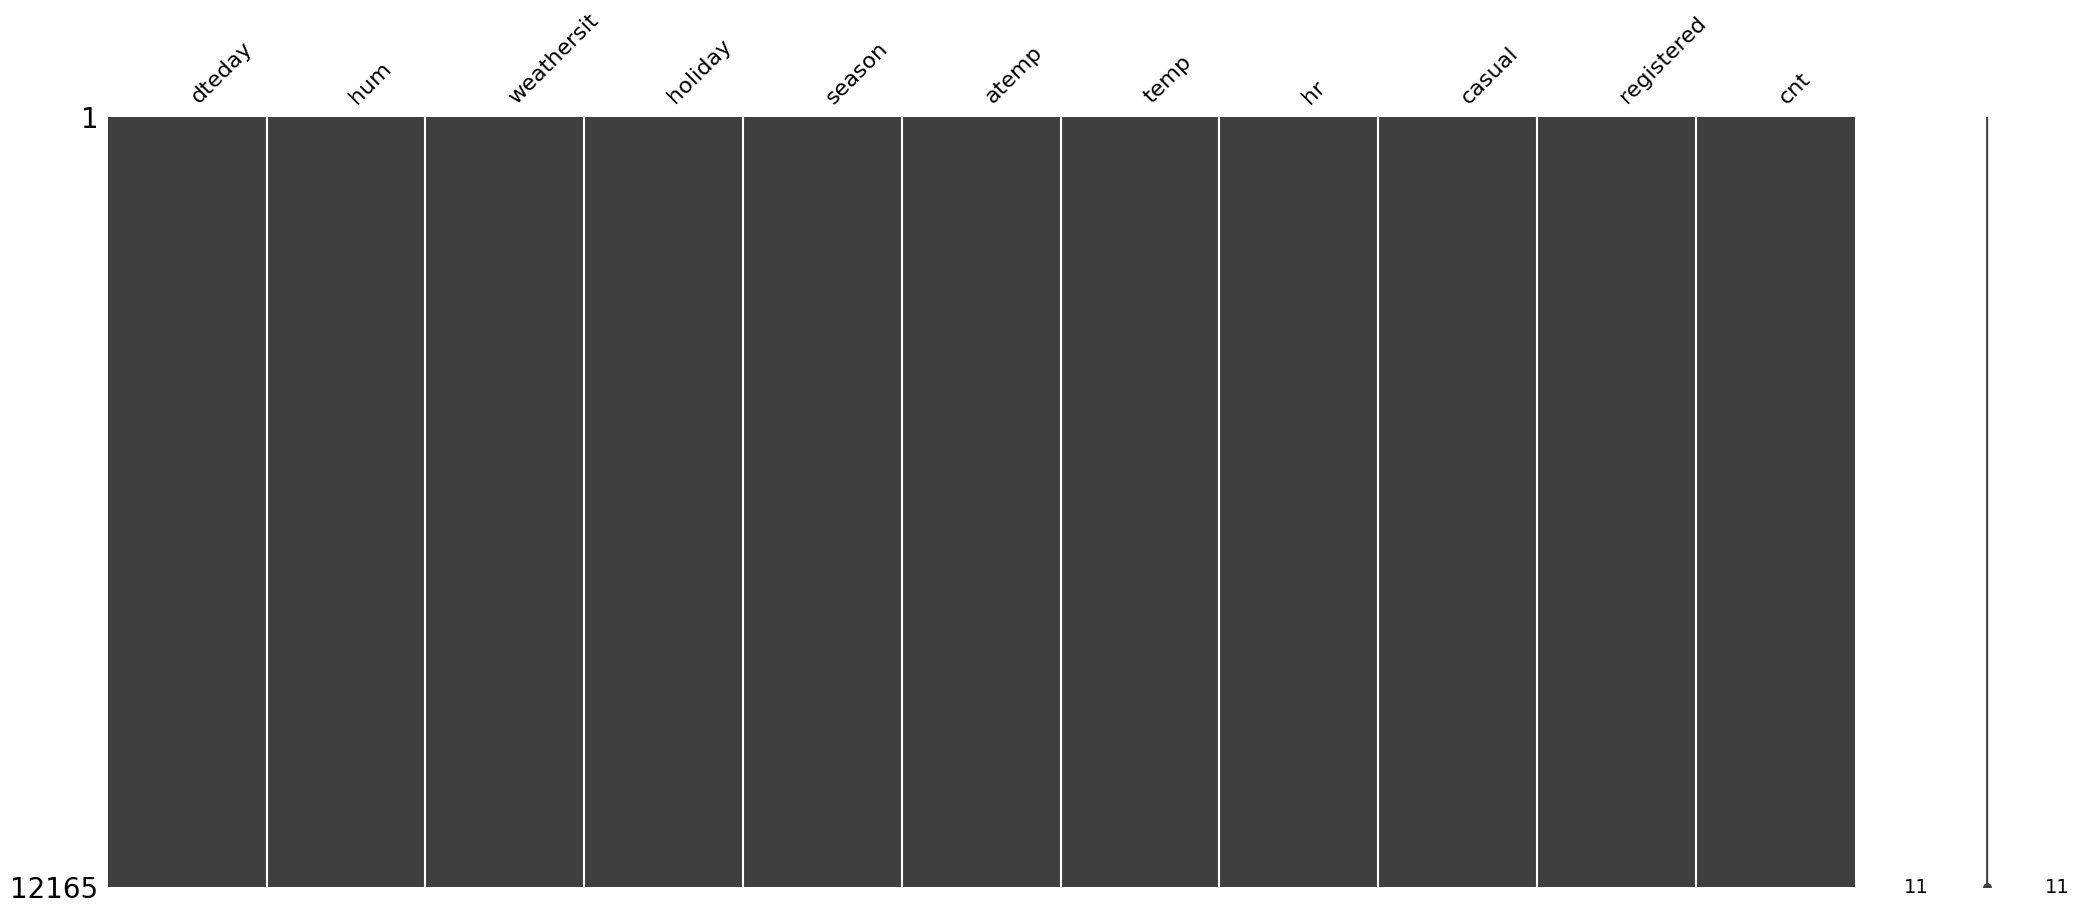

In [11]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(df)

## Data Duplikat

In [12]:
# jumlah yang duplikat
df.duplicated().sum()

0

In [13]:
# mendrop data dupliat
df.drop_duplicates(inplace = True)

In [14]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


## Memilih Kolom yang Relevan

kolom-kolom berikut akan dihapus dari analisis lebih lanjut karena dianggap redundan atau tidak relevan:

1. dteday: Ini berisi tanggal, namun kita sudah memiliki kolom terpisah untuk 'year' (tahun) dan 'month' (bulan), jadi kolom ini bisa diabaikan.

2. casual dan registered: Kedua kolom ini berisi jumlah sepeda yang disewa oleh kategori pelanggan yang berbeda. Karena tujuan kita adalah untuk menemukan total jumlah sepeda, bukan berdasarkan kategori spesifik, maka kedua kolom ini tidak diperlukan.

Selain itu, sudah dibuat variabel baru (cnt) untuk menghitung rasio antara jenis pelanggan tersebut.
Setelah kolom-kolom ini dihapus, DataFrame baru dengan nama df_new, sehingga dataset asli tetap terjaga untuk analisis atau validasi di masa depan.

In [15]:
columns_to_drop = ['dteday', 'registered', 'casual']
df_new = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df_new

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,0.62,1,0,4,0.3485,0.36,16,250
1,0.64,1,0,2,0.5152,0.54,4,18
2,0.53,1,0,2,0.6212,0.62,23,107
3,0.87,2,0,2,0.3485,0.36,8,145
4,0.55,1,0,3,0.6970,0.76,18,857
...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,257
12161,0.62,1,0,3,0.7424,0.78,0,102
12162,0.60,2,1,1,0.2121,0.24,5,6
12163,0.77,2,0,2,0.4242,0.42,2,69


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 760.4 KB


## Variable Numerik

### Statistika Deskriptif

In [17]:
# Statistika dekriptif
df_new.describe() # OTOMATIS hanya mengambil yang numerik

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000


### Distribusi Data

In [18]:
len(df_new.select_dtypes(include = 'number').columns)

8

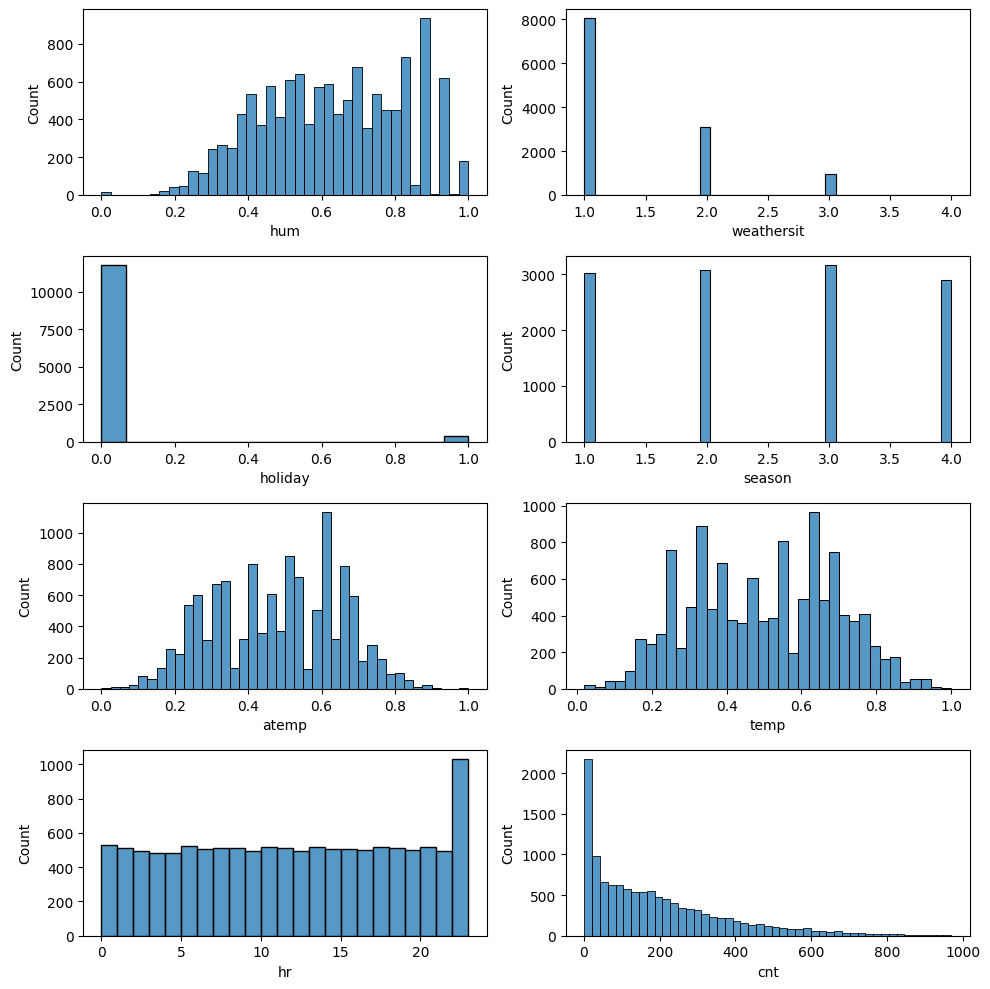

In [19]:
numerik = df_new.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.histplot(df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

**Dari data di atas, terlihat bahwa seluruh variabel terdistribusi tidak normal.**
Namun, atemp dan temp mendekati distribusi normal jika dilihat dari bar plot dan juga nilai mean dan median (50%) dari statistika deskriptif nya hampir sama.

### Outliers

**Perhitungan Outliers untuk setiap variabel.**

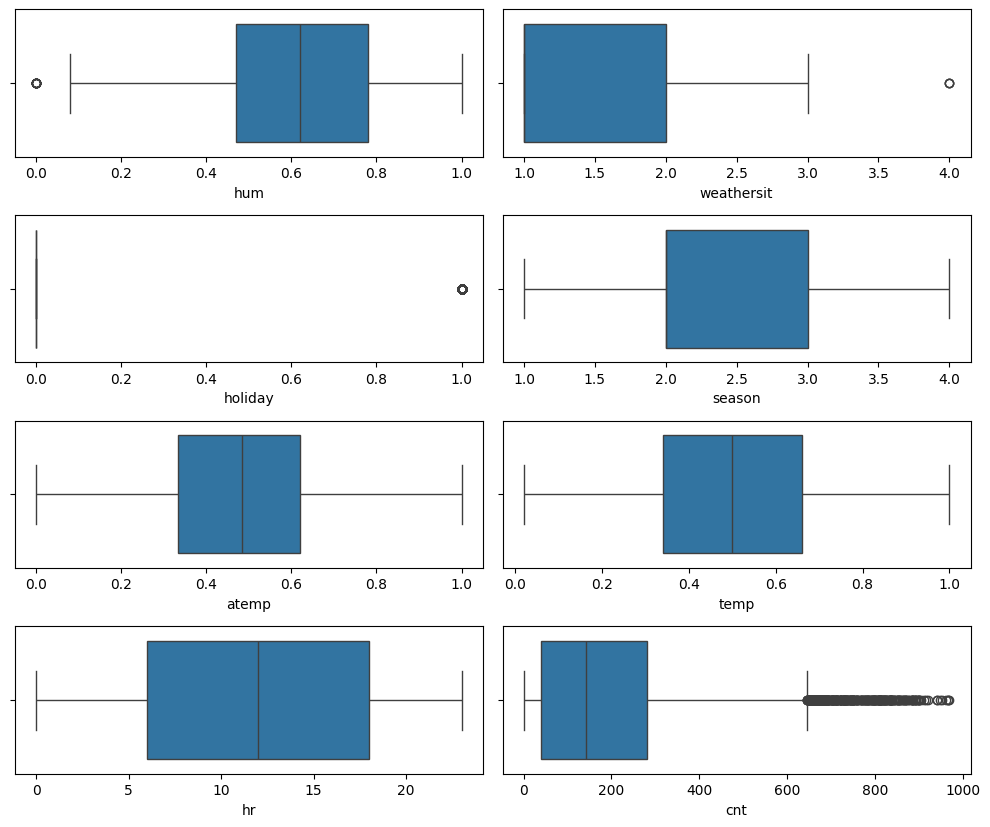

In [20]:
numerik = df_new.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [21]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

}).sort_values(by = 'jumlah outliers', ascending = False)

,kolom,jumlah outliers
2,holiday,362
7,cnt,338
0,hum,14
1,weathersit,3
3,season,0
4,atemp,0
5,temp,0
6,hr,0


**Setelah dilakukan perhitungan, jumlah outliers tidak terlalu signifikan, hanya satu variabel yang memiliki jumlah outliers cukup banyak, yaitu 'cnt' sebanyak 338, namun tidak terlalu signifikan jika dibandingkan dengan jumlah data yaitu 12.165.**

### Korelasi

**Akan dilakukan pembuatan HeatMap untuk mengetahui hubungan antar variabel.**

<Axes: >

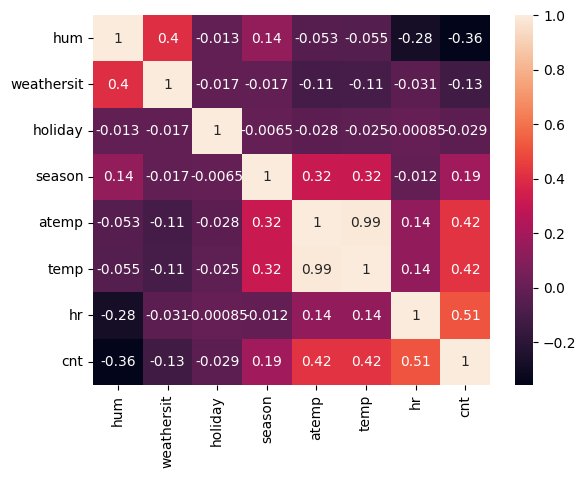

In [22]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

**Intepretasi Hasil Heatmap**


**Representasi visual dari matriks korelasi antara variabel-variabel dalam dataset, di mana:**

**Korelasi Positif:**
1. hr (jam) dan cnt (jumlah sewa) memiliki korelasi positif kuat (0.51), menunjukkan bahwa kenaikan pada variabel hr mungkin diikuti oleh kenaikan cnt.
2. temp dan atemp dengan cnt memiliki korelasi positif kuat (0,42), menunjukkan bahwa kenaikan pada variabel hr mungkin diikuti oleh kenaikan cnt.
3. Season (musim) memiliki korelasi positif, walaupun tidak terlalu besar.

**Korelasi Negatif:**
1. hum (kelembaban) memiliki korelasi negatif (-0.36) dengan cnt, yang menunjukkan bahwa peningkatan kelembaban cenderung diikuti oleh penurunan dalam cnt.
2. Variabel weathersit dengan cnt memiliki korelasi negatif (-0,13), menunjukan bahwa cuaca buruk cenderung diikuti oleh penurunan dalam cnt.


**Korelasi Dekat Nol:**
1. Variabel holiday dengan cnt memiliki korelasi yang sangat kecil (-0.029), menunjukkan hampir tidak ada hubungan linier antara hari libur dan jumlah sewa.




###**Feature Selection**

**Pemilihan Fitur:**
Fitur dengan korelasi tinggi terhadap variabel dependen cnt (seperti temp, atemp, dan hr) akan diprioritaskan karena memberikan pengaruh signifikan.
Fitur dengan korelasi rendah atau mendekati nol (seperti holiday) mungkin kurang relevan dan akan dipertimbangkan untuk dihapus agar model lebih sederhana dan efektif.

**Korelasi Antar Fitur:**
Korelasi yang sangat tinggi antara dua fitur, seperti antara temp dan atemp (0.99), menunjukkan multikolinearitas. Dalam regresi, ini bisa menyebabkan masalah interpretasi atau stabilitas model. Salah satu dari dua variabel tersebut akan dihapus. Dalam hal ini, atemp akan didrop karena kolom temp dirasa lebih jelas memberikan gambaran bagaimana temperatur mempengaruhi jumlah sewa, sedangkan atemp akan menyebabkan pengaruh yang bias karena tidak hanya berkaitan dengan temperatur, namun dapat diartikan dipengaruhi oleh hal lain seperti kelembapan. Selain itu, kelembapan sudah dipisah dalam variabel tersendiri yaitu hum.


**Langkah Selanjutnya adalah akan di drop kolom kolom holiday dan atemp, dan variabel independent yang akan digunakan adalah hr, temp, season, hum, dan weathersit.**

In [23]:
columns_to_drop = ['holiday', 'atemp']
df_new = df_new.drop(columns=[col for col in columns_to_drop if col in df_new.columns])
df_new

,hum,weathersit,season,temp,hr,cnt
0,0.62,1,4,0.36,16,250
1,0.64,1,2,0.54,4,18
2,0.53,1,2,0.62,23,107
3,0.87,2,2,0.36,8,145
4,0.55,1,3,0.76,18,857
...,...,...,...,...,...,...
12160,0.75,1,1,0.24,7,257
12161,0.62,1,3,0.78,0,102
12162,0.60,2,1,0.24,5,6
12163,0.77,2,2,0.42,2,69


### Multikolineartias dengan VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# buat function
def calc_vif(x):
    # dataframe kosong
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vig untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


Drop kolom cnt karena akan dijadikan variable dependent

In [25]:
numerik = df_new.drop(columns=['cnt'])
calc_vif(numerik).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,hum,10.728836
3,temp,7.430662
1,weathersit,7.135416
2,season,6.740841
4,hr,3.451054


**Berdasarkan hasil VIF, dapat dilihat bahwa variabel hum akan didrop karena nila VIF nya di atas 10 dan dirasa ada hubungan multikolinearitas yang tinggi.**

In [26]:
df_new=df_new.drop(columns=['hum'])
df_new

,weathersit,season,temp,hr,cnt
0,1,4,0.36,16,250
1,1,2,0.54,4,18
2,1,2,0.62,23,107
3,2,2,0.36,8,145
4,1,3,0.76,18,857
...,...,...,...,...,...
12160,1,1,0.24,7,257
12161,1,3,0.78,0,102
12162,2,1,0.24,5,6
12163,2,2,0.42,2,69


## Variabel Kategorik

### Describe

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weathersit  12165 non-null  int64  
 1   season      12165 non-null  int64  
 2   temp        12165 non-null  float64
 3   hr          12165 non-null  int64  
 4   cnt         12165 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 475.3 KB


Dapat dilihat bahwa sudah tidak ada variable kategorik, dan semua variabel sudah dideskripsikan di variabel numerik.

# Data Cleaning

In [28]:
# Jumlah data kosong (NaN) untuk setiap variable
df_new.isnull().sum()

,0
weathersit,0
season,0
temp,0
hr,0
cnt,0


**Dalam hal ini tidak ada data kosong, sehingga Handling Missing Values tidak perlu dilakukan.**

In [29]:
# jumlah yang duplikat
df_new.duplicated().sum()

313

**Walaupun pengujian menunjukan adanya 313 data duplikat, namun hal ini sudah tidak relevan dengan arti dari data duplikat, karena saat dilakukan pengujian data duplikat pada section Data Understanding belum ditemukan data duplikat. Hal ini terjadi karena masih ada kolom tanggal dalam data (df), namun di pengujian ini (df_new) kolom tanggal sudah di drop, sehingga kemungkinan besar data duplikat di setiap kolom, namun di tanggal yang berbeda. Sehingga data akan tetap digunakan dan tidak di drop.**

In [30]:
numerik = df_new.select_dtypes(include = 'number')


list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

}).sort_values(by = 'jumlah outliers', ascending = False)

,kolom,jumlah outliers
4,cnt,338
0,weathersit,3
1,season,0
2,temp,0
3,hr,0


**Selanjutnya akan dilakukan pembuatan data baru tanpa Outliers agar dapat digunakan dalam membuat Experiment Model tanpa Outliers**

In [31]:
# Menghapus outliers
df_new_without_outliers = numerik.copy()

for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis
    df_new_without_outliers = df_new_without_outliers[
        (df_new_without_outliers[setiap_kolom] <= upper_bound) &
        (df_new_without_outliers[setiap_kolom] >= lower_bound)
    ]


# Menampilkan DataFrame baru tanpa outliers
df_new_without_outliers

,weathersit,season,temp,hr,cnt
0,1,4,0.36,16,250
1,1,2,0.54,4,18
2,1,2,0.62,23,107
3,2,2,0.36,8,145
5,1,4,0.46,0,45
...,...,...,...,...,...
12160,1,1,0.24,7,257
12161,1,3,0.78,0,102
12162,2,1,0.24,5,6
12163,2,2,0.42,2,69


# EDA (Exploratory Data Analysis)


Berikut merupakan nilai wethersit, season, temp, hr dan cnt dari masing-masing variabel.

In [32]:
df_new.describe()

,weathersit,season,temp,hr,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,1.416934,2.488615,0.498185,11.519770,189.271023
std,0.635937,1.106157,0.192492,6.931872,181.223903
min,1.000000,1.000000,0.020000,0.000000,1.000000
25%,1.000000,2.000000,0.340000,6.000000,40.000000
50%,1.000000,2.000000,0.500000,12.000000,142.000000
75%,2.000000,3.000000,0.660000,18.000000,282.000000
max,4.000000,4.000000,1.000000,23.000000,970.000000


<Axes: >

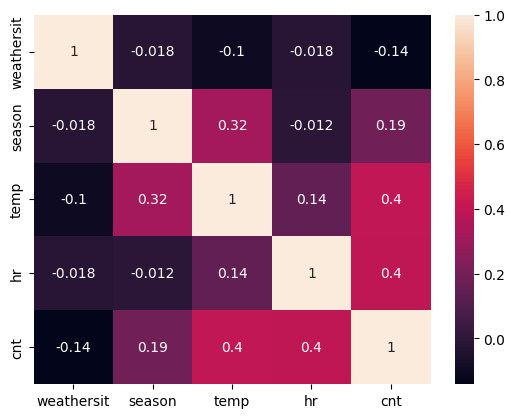

In [33]:
sns.heatmap(df_new.select_dtypes(include = 'number').corr(), annot = True)

**Intepretasi Hasil Heatmap untuk dataset baru setelah Fitur Selection:**

Representasi visual dari matriks korelasi antara variabel-variabel dalam dataset, di mana:

**Korelasi Positif:**
1. hr (jam) dan cnt (jumlah sewa) memiliki korelasi positif kuat (0.4), menunjukkan bahwa kenaikan pada variabel hr mungkin diikuti oleh kenaikan cnt.
2. temp dengan cnt memiliki korelasi positif kuat (0,4), menunjukkan bahwa kenaikan pada variabel hr mungkin diikuti oleh kenaikan cnt.
3. Season (musim) memiliki korelasi positif (0,19), walaupun tidak terlalu besar.

**Korelasi Negatif:**

Variabel weathersit dengan cnt memiliki korelasi negatif (-0,14), menunjukan bahwa cuaca buruk cenderung diikuti oleh penurunan dalam jumalh sewa sepeda (cnt).


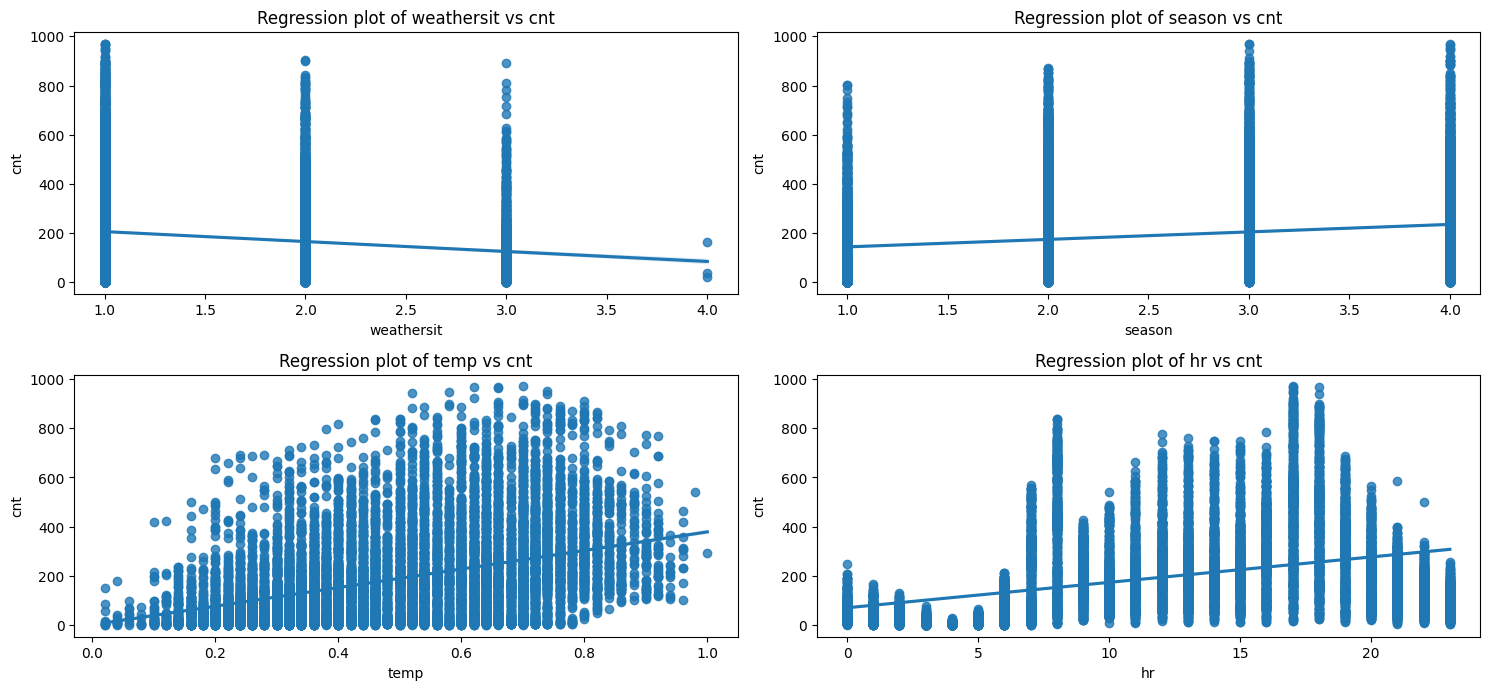

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#Deskripsi kolom
columns_to_plot = df_new.drop(columns='cnt').columns

# Mebuat subplots
plt.figure(figsize=(15, 10))

# Looping kolom dan membuat subplot
for idx, col in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 2, idx)  # Adjust subplot grid as needed
    sns.regplot(x=df_new[col], y=df_new['cnt'])
    plt.title(f'Regression plot of {col} vs cnt')

# Menyesuaikan layout
plt.tight_layout()
plt.show()



# Data Splitting

In [35]:
# Memisahkan data independen variabel dengan target
X = df_new.drop(columns = 'cnt')
y = df_new['cnt']

In [36]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(

   X,
   y,
    test_size = 0.2,
    random_state = 42,
)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9732, 4), (2433, 4), (9732,), (2433,))

# Data Preparation

In [38]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

- Weathersit dan season dilakukan OneHot Encoder karena memiliki unique value dibawah 10.
- Weathersit dan Season dilakukan BinaryEncoder karena mengubah kategori ke numerikal sesuai di deskripsi masing-masing variabel.
- Temp dan hr dilakukan MinMaxScaler agar data dinormalisasi dalam rentang 0-1 sesuai penjelasan di bagian penjelasan setiap variable.

In [39]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown='ignore', drop = 'first'), ['weathersit','season']), # Added handle_unknown='ignore' to the OneHotEncoder
    ('binary', BinaryEncoder(), ['weathersit','season']),
    ('scaler', MinMaxScaler(), ['temp','hr'])
], remainder = 'passthrough')
transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['weathersit', 'season']),
                                ('binary', BinaryEncoder(),
                                 ['weathersit', 'season']),
                                ('scaler', MinMaxScaler(), ['temp', 'hr'])])

# Modelling

## Rule Based Model (Non ML)

Memahami Hubungan Antar Variabel

**Target variabel:** cnt (jumlah sepeda yang disewa)

**Variabel independen:**
1. Weathersit: berkorelasi negatif (cuaca yang buruk menurunkan jumlah sepeda yang dipinjam)
2. Season: berkorelasi positif (beberapa musim memiliki lebih banyak peminjaman)
3. Temp: berkorelasi positif (semakin hangat, semakin banyak sepeda yang dipinjam)
4. Hr: berkorelasi positif (waktu tertentu dalam sehari mungkin memiliki lebih banyak peminjaman)

In [40]:
df_new

,weathersit,season,temp,hr,cnt
0,1,4,0.36,16,250
1,1,2,0.54,4,18
2,1,2,0.62,23,107
3,2,2,0.36,8,145
4,1,3,0.76,18,857
...,...,...,...,...,...
12160,1,1,0.24,7,257
12161,1,3,0.78,0,102
12162,2,1,0.24,5,6
12163,2,2,0.42,2,69


**Membuat Rule Based Model**

In [41]:
def rule_based_model(row):
    # Aturan awal: nilai awal cnt adalah 0
    cnt_prediction = 0

    # Menambahkan efek suhu (semakin tinggi suhu, semakin banyak sepeda yang dipinjam)
    cnt_prediction += row['temp'] * 500  # misal pengaruh suhu dinilai 500 per satuan

    # Menambahkan efek musim (lebih banyak sepeda di musim tertentu)
    if row['season'] == 1:  # Musim dingin
        cnt_prediction += 100
    elif row['season'] == 2:  # Musim semi
        cnt_prediction += 300
    elif row['season'] == 3:  # Musim panas
        cnt_prediction += 400
    elif row['season'] == 4:  # Musim gugur
        cnt_prediction += 200

    # Menambahkan efek jam (waktu sibuk seperti pagi dan sore lebih banyak sepeda yang dipinjam)
    if row['hr'] in range(6, 10):  # Jam sibuk pagi
        cnt_prediction += 1000
    elif row['hr'] in range(17, 20):  # Jam sibuk sore
        cnt_prediction += 1000

    # Mengurangi pengaruh cuaca buruk (cuaca buruk mengurangi jumlah sepeda yang dipinjam)
    if row['weathersit'] == 1:  # Cuaca cerah
        cnt_prediction -= 0
    elif row['weathersit'] == 2:  # Cuaca berawan
        cnt_prediction -= 200
    elif row['weathersit'] == 3:  # Cuaca sedikit hujan/salju
        cnt_prediction -= 500
    elif row['weathersit'] == 4:  # Hujan hujan/salju deras
        cnt_prediction -= 1000

    return cnt_prediction

**Menerapkan Model Dataset**

In [42]:
# Menerapkan rule-based model ke setiap baris data
df_new['cnt_prediction'] = df_new.apply(rule_based_model, axis=1)

# Melihat hasil prediksi
df_new[['cnt', 'cnt_prediction']]


,cnt,cnt_prediction
0,250,380.0
1,18,570.0
2,107,610.0
3,145,1280.0
4,857,1780.0
...,...,...
12160,257,1220.0
12161,102,790.0
12162,6,20.0
12163,69,310.0


**Evaluasi Model**

**Model dievaluasi berdasarkan tiga metrik: MAE, dan RMSE. Hasil evaluasi disimpan untuk analisis lebih lanjut.**

In [43]:
import numpy as np


# Evaluasi hasil dari rule based yang digunakan
nilai_mean_rmse = np.sqrt(np.mean((df_new['cnt'] - df_new['cnt_prediction'])**2))
nilai_std_rmse = np.std(df_new['cnt'] - df_new['cnt_prediction'])  # Contoh menghitung standar deviasi
nilai_mean_mae = np.mean(np.abs(df['cnt'] - df_new['cnt_prediction']))  # Menghitung MAE
nilai_std_mae = np.std(np.abs(df['cnt'] - df_new['cnt_prediction']))  # Menghitung standar deviasi MAE

# Membuat DataFrame untuk hasil evaluasi
df0 = pd.DataFrame({
    'Model': ['Rule Based'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
})

# Melihat hasil evaluasi
df0

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE
0,Rule Based,537.607398,426.249294,686.083213,455.919953


Hasil evaluasi dari model rule-based (non machine learning) menunjukkan beberapa metrik performa sebagai berikut:


1. **Mean_MAE (537.61):**
Mean Absolute Error (MAE) adalah rata-rata dari kesalahan absolut antara nilai aktual dan prediksi. Nilai 537.61 menunjukkan bahwa, rata-rata, prediksi model menyimpang dari nilai aktual sebesar 537.61. Ini memberikan gambaran yang lebih langsung tentang kesalahan prediksi dibandingkan RMSE, karena MAE tidak memperhitungkan kuadrat dari kesalahan.
2. **Std_MAE (426.25):**
Standar Deviasi MAE juga menunjukkan variasi kesalahan prediksi, dengan nilai 426.25. Ini menunjukkan bahwa meskipun rata-rata kesalahan MAE cukup rendah, ada variasi yang cukup besar dalam kesalahan yang dialami model.
3. **Mean_RMSE (686.08):**
Root Mean Squared Error (RMSE) mengukur rata-rata kesalahan prediksi dalam unit yang sama dengan target (cnt). Nilai RMSE sebesar 686.08 menunjukkan bahwa rata-rata kesalahan antara nilai aktual dan nilai prediksi adalah sekitar 686.08. Semakin rendah nilai RMSE, semakin baik model dalam memprediksi.
4. **Std_RMSE (455.92):**
Standar Deviasi RMSE mengukur seberapa besar variasi kesalahan prediksi dari nilai rata-rata RMSE. Nilai 455.92 menunjukkan ada variasi yang signifikan dalam kesalahan prediksi model. Jika nilai ini tinggi, artinya model tidak konsisten dalam prediksi.

**Kesimpulan**
Secara keseluruhan, hasil evaluasi ini menunjukkan bahwa model rule-based yang digunakan memiliki performa yang kurang memuaskan. Metrik seperti MAE dan RMSE menunjukkan kesalahan yang signifikan.

## Experiment 1: Based Model

Pemodelan regresi menggunakan beberapa algoritma yang berbeda, yaitu Linear Regression, K-Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, dan XGBoost Regressor. Pemodelan dilakukan dalam skala logaritmik untuk meningkatkan akurasi dan stabilitas model, kemudian hasilnya akan diubah kembali ke skala aslinya menggunakan fungsi invers logaritma.

In [44]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-175.13307946 -174.32471294 -172.92137797 -184.74934643 -180.02953031] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-116.98651548 -118.0887538  -115.78057134 -124.90985517 -121.42075816] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-113.47265848 -112.61168205 -108.60829194 -117.55990081 -111.25072222] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-73.43791389 -72.09442578 -69.31534419 -76.26968745 -72.33187798] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-125.837799   -124.80713587 -123.84342051 -130.77081961 -125.65838122] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-81.34256781 -79.66509391 -78.07751189 -84.83579391 -81.27411814] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-115.56956737 -114.57861458 -111.25519455 -119.71933202 -115.73456677] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-75.2653642  -73.34776933 -70.43785713 -78.000359   -75.22661563] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-106.41660054 -106.22008681 -102.25825416 -112.40995049 -107.26571015] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  i

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-68.76454411 -68.13556515 -64.63958378 -72.15547228 -69.14789312] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  import

In [45]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
df1 = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
})
df1

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE
0,Linear Regression,-119.437291,3.319023,-177.431609,4.372109
1,KNN Regressor,-72.689850,2.246989,-112.700651,2.934823
2,DecisionTree Regressor,-81.039017,2.245934,-126.183511,2.400380
3,RandomForest Regressor,-74.455593,2.497400,-115.371455,2.707299
4,XGBoost Regressor,-68.568612,2.402678,-106.914120,3.247586


Berdasarkan hasil evaluasi dari beberapa model regresi yang telah dijalankan, berikut adalah analisis performa model:


**1. Mean MAE (Mean Absolute Error)**
- XGBoost Regressor juga memiliki Mean MAE terendah (-68.57), diikuti oleh KNN Regressor (-72.65) dan Random Forest Regressor (-74.46).
- Linear Regression lagi-lagi memiliki performa terburuk dalam hal MAE, yang menunjukkan kesalahan prediksi absolutnya lebih besar dibandingkan model lainnya.

**2. Mean RMSE (Root Mean Squared Error)**

- XGBoost Regressor memiliki Mean RMSE terendah (-106.91), yang berarti bahwa prediksinya paling mendekati nilai sebenarnya dibandingkan model lain.
- KNN Regressor dan Random Forest Regressor juga memiliki nilai RMSE yang lebih rendah daripada Linear Regression dan Decision Tree Regressor.
- Linear Regression memiliki performa terburuk dalam hal RMSE, menunjukkan bahwa model linier tidak menangkap kompleksitas hubungan dalam data dengan baik.

**3. Standard Deviation (Std)**
- KNN Regressor memiliki Std RMSE, dan Std MAE yang paling rendah, yang menunjukkan bahwa model ini memberikan hasil yang paling konsisten.
- XGBoost Regressor dan Random Forest Regressor menunjukkan konsistensi yang cukup baik juga.
- Linear Regression memiliki Standard Deviation tertinggi untuk MAE dan RMSE, menunjukkan bahwa performanya kurang stabil.

**Kesimpulan**
- XGBoost Regressor adalah model terbaik dalam hal akurasi (dilihat dari RMSE dan MAE) dan menawarkan keseimbangan yang baik antara error yang kecil dan stabilitas model.
- KNN Regressor juga menunjukkan performa yang baik, terutama dalam konsistensi, meskipun secara keseluruhan masih sedikit lebih buruk dari XGBoost.
- Random Forest Regressor adalah pilihan bagus lainnya, namun XGBoost tetap unggul dalam semua metrik.
- Linear Regression menunjukkan performa terburuk, yang menandakan model ini tidak cocok untuk dataset ini, kemungkinan karena ketidaklinearitas hubungan antar variabel.

**Dari hasil ini, XGBoost Regressor dapat dianggap sebagai model terbaik untuk data ini, dan bisa dipertimbangkan sebagai model akhir untuk digunakan.**

**Selanjutnya akan dilakukan eksperiment kedua dengan menghapus outliers**

## Experiment 2: Hapus Outliers

**Sama seperti eksperiment pertama, namun di sini dataset yang digunakan adalah dataset setelah dilakukan penghapusan outliers, yaitu df_new_without_outliers.**

In [46]:
# Memisahkan data independen variabel dengan target
X = df_new_without_outliers.drop(columns = 'cnt')
y = df_new_without_outliers['cnt']

In [47]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(

   X,
   y,
    test_size = 0.2,
    random_state = 42,
)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9459, 4), (2365, 4), (9459,), (2365,))

In [49]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

[-151.71457685 -150.43128709 -163.53303583 -148.70379594 -148.29883995] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-105.78821781 -103.48070416 -115.5946545  -102.62363392 -102.95097937] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -97.26039717  -98.3539689  -104.82664486  -97.61344404  -96.13353826] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-63.90537049 -65.55546918 -70.49490946 -64.89370814 -62.21674504] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-111.69025601 -114.54605827 -116.31619404 -107.53458767 -108.58743902] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor

In [50]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
df2= pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse
})
df2

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE
0,Linear Regression,-106.087638,4.880719,-152.536307,5.633448
1,KNN Regressor,-65.413240,2.778660,-98.837599,3.078981
2,DecisionTree Regressor,-72.811159,2.403306,-111.734907,3.359821
3,RandomForest Regressor,-66.597842,2.686114,-100.778516,3.033367
4,XGBoost Regressor,-62.006131,2.856224,-93.967735,3.607988


Berdasarkan hasil evaluasi setelah menghapus outliers dari dataset, berikut analisisnya dengan membandingkan model sebelum dan sesudah penghapusan outliers:


**1. Mean MAE (Mean Absolute Error)**

  Semua model menunjukkan penurunan dalam MAE setelah penghapusan outliers.
- XGBoost Regressor tetap yang terbaik dengan Mean MAE sebesar -62.00, yang lebih baik daripada performa sebelumnya sebesar -68.57.
- KNN Regressor juga menunjukkan peningkatan besar, dari -72.65 menjadi -65.42.
- Linear Regression mengalami penurunan dari -119.57 menjadi -106.13, namun tetap menunjukkan kesalahan prediksi absolut yang lebih tinggi daripada model non-linear lainnya.

**2. Perbaikan Performansi pada Semua Model**
- Linear Regression: Mean RMSE turun dari -177.59 menjadi -152.60 setelah penghapusan outliers. Meskipun ini menunjukkan peningkatan, model ini tetap yang terburuk di antara semua model lain.
- KNN Regressor: RMSE turun dari -112.77 menjadi -98.97, menunjukkan peningkatan yang signifikan setelah penghapusan outliers.
- Decision Tree Regressor: RMSE juga berkurang dari -126.18 menjadi -111.73 setelah penghapusan outliers.
- Random Forest Regressor: Perbaikan terlihat dengan RMSE turun dari -115.37 menjadi -100.77.
- XGBoost Regressor: RMSE juga berkurang dari -106.91 menjadi -93.97, menjadikannya tetap model terbaik dengan performa yang lebih baik setelah penghapusan outliers.

**3. Standard Deviation (Std)**
- Konsistensi model (dilihat dari Standard Deviation) umumnya membaik setelah penghapusan outliers, khususnya pada XGBoost Regressor dengan penurunan Std_MAE dan Std_RMSE yang lebih kecil, menunjukkan model ini tetap stabil.
- Random Forest dan KNN Regressor juga menunjukkan stabilitas yang lebih baik.
- Linear Regression masih memiliki Std yang cukup tinggi, menunjukkan performa yang tidak konsisten bahkan setelah penghapusan outliers.

**Kesimpulan**
- XGBoost Regressor terus menjadi model terbaik baik sebelum maupun sesudah penghapusan outliers, dengan MAE dan RMSE terendah, serta konsistensi yang lebih baik setelah penghapusan outliers.
- KNN Regressor dan Random Forest Regressor juga menunjukkan peningkatan signifikan setelah penghapusan outliers dan dapat dipertimbangkan sebagai alternatif, meskipun XGBoost masih unggul.
- Linear Regression menunjukkan peningkatan performa, namun masih tertinggal jauh dibandingkan model lainnya. Ini mengindikasikan bahwa hubungan antara fitur dan target tidak sepenuhnya linear, dan model non-linear lebih sesuai.

**Secara keseluruhan, menghapus outliers membantu meningkatkan performa semua model, terutama model yang lebih kompleks seperti XGBoost dan Random Forest. Penghapusan outliers bisa dipertimbangkan sebagai langkah penting dalam pre-processing data jika ingin mendapatkan prediksi yang lebih akurat.**

## Hasil Eksperimen

In [51]:
df0['Eksperimen'] = 'Rule Based'
df1['Eksperimen'] = 'Based Model'
df2['Eksperimen'] = 'Without Outliers'

# penggabungan semua df score
df_gab = pd.concat([df0, df1, df2], axis = 0)
df_gab = df_gab.set_index(['Eksperimen','Model'])
df_gab


Mean_MAE     Std_MAE   Mean_RMSE  \
Eksperimen       Model                                                        
Rule Based       Rule Based              537.607398  426.249294  686.083213   
Based Model      Linear Regression      -119.437291    3.319023 -177.431609   
                 KNN Regressor           -72.689850    2.246989 -112.700651   
                 DecisionTree Regressor  -81.039017    2.245934 -126.183511   
                 RandomForest Regressor  -74.455593    2.497400 -115.371455   
                 XGBoost Regressor       -68.568612    2.402678 -106.914120   
Without Outliers Linear Regression      -106.087638    4.880719 -152.536307   
                 KNN Regressor           -65.413240    2.778660  -98.837599   
                 DecisionTree Regressor  -72.811159    2.403306 -111.734907   
                 RandomForest Regressor  -66.597842    2.686114 -100.778516   
                 XGBoost Regressor       -62.006131    2.856224  -93.967735   

                                           Std_RMSE  
Eksperimen       Model                               
Rule Based       Rule Based              455.919953  
Based Model      Linear Regression         4.372109  
                 KNN Regressor             2.934823  
                 DecisionTree Regressor    2.400380  
                 RandomForest Regressor    2.707299  
                 XGBoost Regressor         3.247586  
Without Outliers Linear Regression         5.633448  
                 KNN Regressor             3.078981  
                 DecisionTree Regressor    3.359821  
                 RandomForest Regressor    3.033367  
                 XGBoost Regressor         3.607988

**XGBoost Regressor adalah model yang paling baik dari ketiga eksperimen yang dilakukan, baik dengan dan tanpa outliers, memberikan prediksi dengan kesalahan yang lebih rendah.**
**Menghapus outliers memberikan efek positif terhadap performa semua model, terlihat dari penurunan nilai MAE dan RMSE secara keseluruhan.**


**Dengan mempertimbangkan analisis ini, maka direkomendasikan untuk melanjutkan penggunaan model XGBoost dengan dataset tanpa ouliers (df_without_ouliers) dan terus melakukan evaluasi serta tuning untuk meningkatkan performa model di masa mendatang.**

## Final Model

**Predict to Test Set with the Benchmark Model**

**Prediksi pada test set dengan menggunakan model terbaik yaitu XGBoost**

In [52]:
!pip install imblearn
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline

best_model = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['weathersit', 'season']),
                                                 ('binary', BinaryEncoder(),
                                                  ['weathersit', 'season']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['temp', 'hr'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_byleve...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9459, 4), (2365, 4), (9459,), (2365,))

In [54]:
# Melakukan prediksi
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error

# Menghitung standar deviasi
std_mae = np.std(np.abs(y_test - y_pred))  # Standar deviasi dari MAE
std_rmse = np.std(np.sqrt((y_test - y_pred) ** 2))  # Standar deviasi dari RMSE

# Mencetak hasil evaluasi
df_bestmodel= pd.DataFrame({
    'Model': ['Best Model'],
    'Mean_RMSE': rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mae,
    'Std_MAE': std_mae,
})
df_bestmodel

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Best Model,89.339613,65.707143,60.532122,65.707143


## Hyperparameter Tuning


Random Search secara acak memilih kombinasi parameter dalam rentang yang ditentukan, yang sering kali lebih efisien daripada Grid Search. Sedangkan, Grid Search mencoba semua kombinasi dari parameter yang ditentukan.

Dalam hal ini, efisiensi menjadi pertimbangan penting, maka akan digunakan Random Search. Random Search juga merupakan metode yang valid dan efisien.

Random Search masih merupakan pilihan yang baik. Hasilnya cukup mendekati, dan Random Search bisa lebih cepat dalam situasi di mana ruang parameter sangat besar.

Selain itu, komputasi yang digunakan akan lebih ringan.


In [55]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [56]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [57]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['weathersit',
                                                                                'season']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['weathersit',
                                                                                'season']),
                                                                              ('scaler',
                                                                               MinMaxScaler(),
                                                                               ['temp',
                                                                                'hr'])])),...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [58]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE dan MAE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
17,0.514691,0.115480,0.043661,0.014652,0.6,0.001000,190,5,0.04,9,...,2.901737,1,-60.039618,-61.089744,-65.900841,-60.369759,-59.102677,-61.300528,2.387219,1
23,0.309337,0.060435,0.029999,0.013038,0.9,3.593814,153,4,0.33,9,...,2.913481,2,-61.730280,-62.437839,-67.313862,-62.094601,-60.848692,-62.885055,2.276815,5
18,0.365334,0.053909,0.046018,0.013115,0.9,0.007743,177,2,0.83,10,...,3.212781,3,-61.645371,-62.947244,-67.342644,-61.976551,-60.225274,-62.827417,2.420495,4
22,0.385710,0.038436,0.042241,0.004322,0.7,0.002783,155,4,0.25,8,...,2.973403,4,-62.373784,-63.382193,-67.879460,-62.689896,-60.759379,-63.416942,2.391430,9
7,0.595240,0.097722,0.049197,0.010800,0.9,0.059948,119,8,0.05,5,...,2.728512,5,-60.628433,-61.627917,-66.195300,-60.869264,-59.512561,-61.766695,2.315770,2


**Interpretasi Hasil:**
1. Baris ke-17 memiliki kombinasi hyperparameter terbaik dengan peringkat pertama dalam hal RMSE dan MAE. Error yang dihasilkan paling rendah, baik dalam hal rata-rata maupun variasi antar fold.
2. Baris lain (seperti baris ke-23 dan 22) memiliki error yang lebih besar dan peringkat lebih rendah.
Model ini sudah diuji dengan banyak kombinasi parameter, dan yang terbaik memberikan performa prediksi yang konsisten dan akurat (terutama pada baris ke-17).

Ini menunjukkan bahwa tuning hyperparameter berhasil menghasilkan model yang lebih optimal dengan performa prediksi yang baik.

In [59]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -61.300527647749185
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Analisis dari hasil tuning model XGBoost dengan Best_score dan Best_params menghasilkan beberapa kesimpulan yang penting untuk performa model, khususnya dalam konteks penurunan error dan peningkatan akurasi prediksi.**

**1. Best_score: -61.30**

Best_score mengindikasikan nilai negatif Root Mean Squared Error (RMSE) terbaik sebesar 61.30. Dalam regresi, RMSE digunakan untuk mengukur seberapa jauh prediksi model dari nilai sebenarnya. Semakin rendah nilai RMSE, semakin baik model dalam melakukan prediksi.
Karena nilai RMSE negatif (dari neg_mean_squared_error), nilai absolutnya sekitar 61.30 unit. Ini berarti bahwa model XGBoost yang telah di-tuning mampu memprediksi variabel target dengan error sekitar 61 unit rata-rata per prediksi.
Jika dibandingkan dengan RMSE model sebelum tuning (misalnya, pada model rule-based dengan RMSE 686.08), hasil ini menunjukkan peningkatan yang sangat signifikan, dengan pengurangan error prediksi lebih dari 10 kali lipat.

**2. Best_params:**

Hyperparameter terbaik yang ditemukan untuk model XGBoost adalah sebagai berikut:
- 'model__subsample': 0.6: Hanya 60% dari data yang digunakan untuk setiap pohon, yang membantu model menghindari overfitting dan meningkatkan generalisasi.
- 'model__reg_alpha': 0.001: Penalti regularisasi L1 yang sangat kecil, yang memungkinkan model tetap fleksibel namun tetap menghindari overfitting secara moderat.
- 'model__n_estimators': 190: Jumlah total pohon yang digunakan oleh XGBoost. Nilai ini lebih tinggi dari model default (biasanya 100), yang menunjukkan bahwa lebih banyak pohon memberikan hasil yang lebih baik.
- 'model__max_depth': 5: Setiap pohon memiliki kedalaman maksimum 5, yang menjaga keseimbangan antara kompleksitas dan kemampuan prediksi model. Kedalaman yang lebih tinggi mungkin akan menyebabkan overfitting, sementara yang terlalu rendah dapat mengurangi kemampuan prediksi.
- 'model__learning_rate': 0.04: Tingkat pembelajaran yang relatif kecil, memastikan bahwa model belajar secara bertahap dan tidak melompati solusi optimal.
- 'model__gamma': 9: Model hanya akan melakukan split jika hasilnya cukup signifikan, membantu mengurangi pembagian pohon yang tidak diperlukan dan meningkatkan stabilitas model.
- 'model__colsample_bytree': 0.9: 90% dari fitur digunakan pada setiap pohon. Ini mengurangi risiko overfitting yang bisa muncul saat terlalu banyak fitur digunakan.

**3. Performa Model yang Optimal:**

Setelah tuning, model XGBoost menunjukkan hasil yang lebih baik dengan RMSE yang lebih rendah. Ini menandakan bahwa model ini lebih baik dalam memprediksi variabel target dibandingkan dengan model lain yang diuji atau dibandingkan dengan versi sebelum tuning.
Dengan set hyperparameter ini, model menunjukkan keseimbangan yang baik antara kompleksitas dan generalisasi, yang terlihat dari regularisasi yang kecil namun efektif (reg_alpha), subsampling data, dan pemilihan pohon yang optimal.

**4. Kesimpulan:**

- Model XGBoost setelah tuning mampu menghasilkan prediksi dengan error sekitar 61.30, jauh lebih baik daripada model awal.
Hyperparameter yang digunakan (subsample, reg_alpha, n_estimators, max_depth, learning_rate, gamma) semuanya berperan penting dalam meningkatkan performa model sambil menjaga keseimbangan antara fleksibilitas model dan overfitting.

- Jika diterapkan dalam skenario bisnis, model ini memberikan prediksi yang lebih akurat, memungkinkan pengambilan keputusan yang lebih tepat, seperti prediksi permintaan yang lebih baik atau optimasi sumber daya di bike-sharing system yang sedang  dianalisis.


**Potensi Langkah Lanjut:**

**Dengan hasil ini, maka dapat dilakukan perhitungan profit berdasarkan perbedaan RMSE antara model rule-based dan XGBoost. Perbedaan error yang besar menunjukkan peluang pengurangan kesalahan prediksi, yang bisa diterjemahkan ke dalam penghematan biaya atau peningkatan efisiensi operasional.**

In [60]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'RMSE': rmse_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,RMSE
XGB,59.157749,85.707028


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [61]:
# Sebelum hyperparameter tuning
df_bestmodel

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Best Model,89.339613,65.707143,60.532122,65.707143


In [62]:
# Setelah hyperparameter tuning
score_after_tuning

,MAE,RMSE
XGB,59.157749,85.707028


Analisis Hasil:

**1. Penurunan MAE dan RMSE:**


MAE setelah tuning turun dari 60.53 menjadi 59.16, menunjukkan penurunan sebesar 1.37 poin. Ini berarti rata-rata kesalahan absolut dalam prediksi telah berkurang, sehingga prediksi model lebih mendekati nilai aktual setelah tuning.
RMSE setelah tuning turun dari 89.34 menjadi 85.71, dengan penurunan sebesar 3.63 poin. RMSE, yang lebih sensitif terhadap kesalahan besar, juga berkurang, menandakan bahwa model telah mengurangi beberapa kesalahan prediksi besar yang mungkin terjadi sebelumnya.

**2. Peningkatan Akurasi:**

Penurunan RMSE dan MAE setelah tuning menunjukkan bahwa tuning hyperparameter berhasil meningkatkan performa model XGBoost.
Karena RMSE menghukum kesalahan besar lebih berat, penurunan pada RMSE yang lebih signifikan dibandingkan MAE menunjukkan bahwa model setelah tuning tidak hanya lebih baik dalam rata-rata prediksi, tetapi juga dalam menangani outliers atau prediksi dengan kesalahan besar.

**3. Manfaat dalam Konteks Bisnis:**

Penurunan MAE dan RMSE menandakan bahwa setelah tuning, model lebih mampu memprediksi hasil dengan lebih akurat. Dalam konteks project bike-sharing, hal ini berarti:
Prediksi permintaan sepeda menjadi lebih tepat, yang dapat berdampak langsung pada efisiensi operasional (misalnya, pengelolaan jumlah sepeda di stasiun, alokasi sumber daya, dll.).
Pengurangan kesalahan besar (RMSE) berarti bahwa cenderung menghindari skenario di mana prediksi salah jauh dari realitas, seperti memprediksi terlalu banyak atau terlalu sedikit sepeda di stasiun tertentu, yang bisa menyebabkan kerugian operasional besar (misalnya kekurangan sepeda atau kelebihan stok).

**4. Kesimpulan:**

**Hasil tuning menunjukkan perbaikan yang nyata dalam performa model, baik dari segi akurasi prediksi rata-rata (MAE) maupun kemampuan model dalam menangani kesalahan besar (RMSE).**

**Dalam konteks bisnis, pengurangan error ini dapat diartikan sebagai pengurangan biaya, peningkatan efisiensi dalam manajemen sumber daya, dan peningkatan profitabilitas karena prediksi permintaan yang lebih akurat.
Secara keseluruhan, tuning hyperparameter ini memberikan peningkatan performa yang menguntungkan, dan bisa menjadi dasar untuk pengambilan keputusan strategis dalam operasi sistem bike-sharing.**

## Penjelasan Model

**XGBoost: Pengertian dan Konsep Utama**

XGBoost (Extreme Gradient Boosting) adalah algoritma machine learning berbasis pohon keputusan (tree-based) yang menggunakan pendekatan boosting untuk meningkatkan akurasi prediksi. XGBoost bekerja dengan cara membangun model secara bertahap dan mengurangi error dari model sebelumnya untuk mencapai prediksi yang lebih akurat.



**Cara Kerja XGBoost dalam Konteks Bike-Sharing:**

1. Boosting: Meningkatkan Akurasi Prediksi

Dalam boosting, model dibangun secara iteratif. Setiap model baru dibentuk untuk memperbaiki error atau kesalahan dari model sebelumnya. Ini membantu meningkatkan akurasi prediksi secara bertahap.
Pada project bike-sharing, XGBoost mempelajari pola-pola dari variabel-variabel seperti jam (hr), cuaca (weathersit), suhu (temp), dan musim (season) untuk memperkirakan jumlah sepeda yang akan dipakai pada waktu tertentu.
Setiap iterasi, model XGBoost mencoba untuk memperbaiki kesalahan prediksi sebelumnya, misalnya jika model sebelumnya salah memprediksi bahwa terlalu sedikit sepeda dibutuhkan pada jam sibuk.

2. Gradient Descent: Meminimalkan Error

XGBoost menggunakan gradient descent untuk meminimalkan fungsi loss atau error. Setiap kali model baru dibuat, XGBoost menghitung seberapa jauh prediksi model dari nilai aktual, dan menggunakan turunan (gradient) untuk menyesuaikan prediksi.
Dalam kasus prediksi permintaan sepeda, fungsi loss ini bisa berupa mean squared error (MSE) atau RMSE. XGBoost secara bertahap mengurangi error ini, sehingga prediksi permintaan sepeda semakin akurat setelah setiap iterasi.


3. Tree-Based Model: Pembentukan Pohon Keputusan

XGBoost membangun banyak pohon keputusan (decision trees) untuk membuat prediksi. Setiap pohon keputusan mencoba membagi data berdasarkan fitur-fitur (seperti jam, cuaca, atau suhu) yang memberikan informasi paling berharga untuk memprediksi permintaan sepeda.
Misalnya, salah satu pohon keputusan mungkin membagi data berdasarkan jam, karena permintaan sepeda cenderung meningkat pada jam sibuk seperti pagi atau sore. Pohon lainnya mungkin membagi data berdasarkan kondisi cuaca, karena cuaca cerah dapat meningkatkan permintaan sepeda.

4. Regularisasi: Menghindari Overfitting

Salah satu kekuatan utama XGBoost adalah kemampuannya untuk menghindari overfitting dengan menggunakan teknik regularisasi. Overfitting terjadi ketika model terlalu rumit dan belajar dari noise dalam data, yang mengurangi kemampuan prediksi pada data baru.
Dalam project bike-sharing, XGBoost menggunakan parameter seperti reg_alpha dan reg_lambda untuk menambahkan penalti pada kompleksitas model, sehingga model tidak hanya berfokus pada data latih, tetapi juga generalisasi ke data baru.

5. Parallel Computing: Efisiensi Komputasi

XGBoost dikenal sebagai algoritma yang sangat cepat dan efisien karena mendukung parallel computing. Ini memungkinkan XGBoost memproses data lebih cepat dibandingkan model tree-based lain.
Dalam konteks project bike-sharing yang memiliki dataset besar dengan banyak fitur seperti waktu, cuaca, dan musim, XGBoost dapat memproses data ini dengan cepat, membuat prediksi dalam waktu yang lebih singkat.


**Implementasi XGBoost dalam Konteks Bike-Sharing**

Dalam project bike-sharing, tujuan yang ingin dicapai adalah memprediksi jumlah sepeda yang akan digunakan pada jam tertentu. Algoritma XGBoost mempelajari pola dari data historis, seperti:

1. hr (jam): Jam pada hari tertentu memiliki korelasi tinggi dengan jumlah sepeda yang digunakan.
2. weathersit (kondisi cuaca): Cuaca juga mempengaruhi permintaan, misalnya cuaca buruk dapat mengurangi permintaan sepeda.
3. season (musim): Musim seperti musim panas atau musim dingin mempengaruhi pola penggunaan sepeda.
4. temp (suhu): Suhu normal atau nyaman biasanya meningkatkan penggunaan sepeda.

XGBoost, dengan kemampuannya mempelajari interaksi antara fitur-fitur ini, memberikan prediksi yang lebih akurat. Misalnya, model akan belajar bahwa pada jam sibuk pagi hari (misalnya pukul 8 pagi) dengan cuaca cerah di musim panas, permintaan sepeda akan tinggi.


**Kelebihan XGBoost untuk Prediksi Bike-Sharing:**

- **Akurasi Tinggi:**
Karena XGBoost secara iteratif mengurangi kesalahan dari model sebelumnya, model ini sering kali memberikan hasil yang sangat akurat, terutama setelah hyperparameter tuning.
Kemampuan Menangani Outliers: XGBoost mampu menangani outliers atau data yang tidak biasa, sehingga cocok untuk dataset yang mungkin memiliki variasi tinggi, seperti dalam permintaan sepeda.

- **Kecepatan dan Efisiensi:** Dengan kemampuan parallel computing, XGBoost dapat memproses data dengan cepat, yang sangat berguna dalam project dengan dataset besar dan banyak fitur.

- **Fleksibilitas:** XGBoost dapat disesuaikan dengan berbagai tipe data dan masalah, termasuk regresi (seperti prediksi jumlah sepeda) atau klasifikasi.

**Kesimpulan:**
**XGBoost adalah algoritma yang sangat cocok untuk prediksi jumlah sepeda pada project bike-sharing karena mampu menangani data kompleks dan menghasilkan prediksi yang akurat dengan mengurangi error secara bertahap. Model ini juga efisien dan fleksibel, dengan kemampuan untuk menghindari overfitting dan memanfaatkan parallel processing, sehingga bisa memberikan keuntungan dalam pengambilan keputusan yang lebih tepat terkait manajemen operasional sistem bike-sharing.**

# Final Model Interpretation

## Feature Importances

In [63]:
# Assuming 'model' is your trained XGBRegressor and
# 'transformer' is your ColumnTransformer

best_model = Pipeline([('transformer', transformer), ('model', model['XGB'])])
best_model.fit(X_train, y_train)

# Now, proceed with feature importance extraction:
#feat_imp = best_model.feature_importances_ # If best_model is just the XGBRegressor
# If best_model is a Pipeline, use:
feat_imp = best_model.named_steps['model'].feature_importances_

features = transformer.get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

,features,importance
8,scaler__hr,0.356281
1,one hot__weathersit_3,0.154854
4,one hot__season_4,0.128666
6,binary__season,0.118074
7,scaler__temp,0.108004
5,binary__weathersit,0.075430
2,one hot__season_2,0.021137
0,one hot__weathersit_2,0.018911
3,one hot__season_3,0.018642


<Axes: xlabel='importance', ylabel='features'>

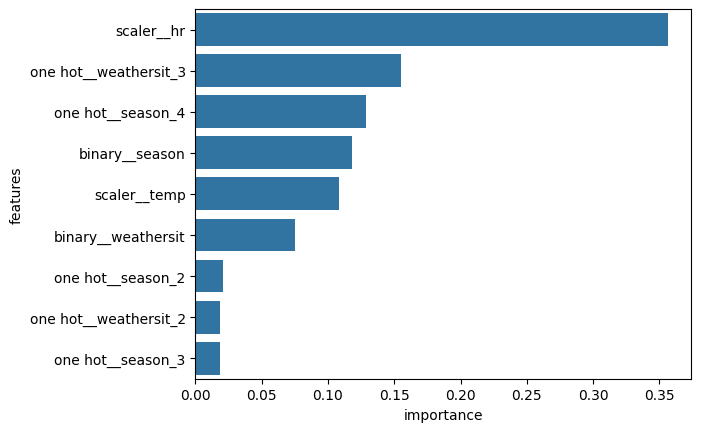

In [64]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

**Interpretasi Feature Importance**

**1. scaler__hr (0.356281)**: Fitur ini memiliki nilai penting tertinggi (35.6%), menandakan bahwa jam dalam sehari adalah faktor yang paling signifikan dalam model prediksi. Ini menunjukkan bahwa pola penggunaan atau permintaan sangat dipengaruhi oleh waktu, di mana waktu-waktu sibuk seperti pagi atau sore hari, atau waktu sepi seperti tengah malam,berkontribusi besar terhadap prediksi.

**2. one hot__weathersit_3 (0.154854)**: Fitur ini mewakili kondisi cuaca "Hujan/Salju ringan" dan memiliki nilai penting sebesar 15.5%. Ini mengindikasikan bahwa cuaca buruk, seperti hujan ringan atau salju, berdampak besar terhadap prediksi, mungkin karena layanan (misalnya, penggunaan sepeda) cenderung menurun dalam kondisi cuaca seperti ini.

**3. one hot__season_4 (0.128666)**: Musim gugur (season 4) memiliki kontribusi signifikan (12.9%). Ini mengindikasikan bahwa penggunaan layanan berkurang atau berubah selama musim gugur, mungkin karena kondisi cuaca yang lebih dingin atau perubahan preferensi pengguna di musim ini.

**4. binary__season (0.118074)**: Fitur ini menyatakan apakah data berada dalam musim tertentu, dalam format biner. Dengan kontribusi sebesar 11.8%, fitur ini menunjukkan bahwa faktor musiman secara keseluruhan (mungkin perbedaan antara musim dingin dan lainnya) cukup berpengaruh terhadap prediksi, menandakan adanya pergeseran pola penggunaan berdasarkan musim.

**5. scaler__temp (0.108004)**: Suhu yang telah dinormalisasi berkontribusi 10.8% terhadap prediksi. Hal ini menunjukkan bahwa suhu adalah faktor penting, di mana suhu yang lebih tinggi mungkin mendorong peningkatan penggunaan layanan (seperti bersepeda), sedangkan suhu yang lebih rendah dapat menghambat aktivitas.

**6. binary__weathersit (0.075430)**: Fitur ini mewakili keadaan cuaca secara umum dalam format biner, dengan kontribusi sebesar 7.5%. Ini menunjukkan bahwa kondisi cuaca (apakah cerah atau tidak) juga mempengaruhi prediksi, namun tidak sebesar fitur lain.

**7. one hot__season_2 (0.021137)**: Musim semi (season 2) hanya berkontribusi sebesar 2.1%. Ini menunjukkan bahwa musim semi tidak memiliki pengaruh yang besar terhadap pola penggunaan, yang mungkin berarti bahwa pengguna lebih aktif pada musim lain seperti musim panas atau gugur.

**8. one hot__weathersit_2 (0.018911)**: Fitur ini mewakili kondisi cuaca "Berawan" dengan kontribusi 1.9%. Ini menunjukkan bahwa cuaca berawan hanya sedikit mempengaruhi keputusan pengguna dalam menggunakan layanan.

**9. one hot__season_3 (0.018642)**: Musim panas (season 3) juga memiliki kontribusi yang sangat kecil (1.9%). Meskipun biasanya musim panas adalah waktu yang lebih hangat, dampaknya terhadap pola penggunaan tidak terlalu signifikan, mungkin karena faktor lain seperti kondisi cuaca atau preferensi pengguna.

**Kesimpulan**

**Fitur Utama:** Fitur yang paling signifikan dalam prediksi adalah scaler__hr dan one hot__weathersit_3. Jam dalam sehari memainkan peran penting dalam memprediksi pola penggunaan, yang mungkin dikaitkan dengan aktivitas rutin harian pengguna. Selain itu, kondisi cuaca buruk (hujan ringan/salju) juga memberikan pengaruh besar terhadap keputusan pengguna.

**Fitur Pendukung:** Faktor musiman, seperti yang diwakili oleh one hot__season_4 dan binary__season, serta suhu (scaler__temp), memberikan kontribusi penting namun lebih rendah dibandingkan fitur utama. Hal ini menunjukkan bahwa pola penggunaan bergantung pada konteks musiman dan cuaca, yang dapat membantu dalam perencanaan strategis untuk meningkatkan layanan.

## Limitasi

### Rentang Optimum Variabel Target

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Membuat bins untuk target 'cnt' dengan kelipatan 50
bins = np.arange(0, max(y_test) + 50, 50)
y_test_binned = pd.cut(y_test, bins=bins)

# Membuat dataframe untuk menyimpan hasil
results = []

# Looping tiap bin untuk menghitung MAE dan RMSE
for bin_range in y_test_binned.unique():
    # Ambil data untuk bin ini
    bin_idx = y_test_binned == bin_range
    y_true_bin = y_test[bin_idx]
    y_pred_bin = y_pred[bin_idx]

    # Hitung MAE dan RMSE
    mae_bin = mean_absolute_error(y_true_bin, y_pred_bin)
    rmse_bin = np.sqrt(mean_squared_error(y_true_bin, y_pred_bin))

    # Simpan hasil ke dalam list
    results.append([bin_range, mae_bin, rmse_bin])

# Membuat tabel hasil
results_df = pd.DataFrame(results, columns=['Range', 'MAE', 'RMSE'])
results_df

,Range,MAE,RMSE
0,"(0, 50]",24.860830,46.318305
1,"(450, 500]",133.737996,163.580375
2,"(300, 350]",69.656437,82.939687
3,"(50, 100]",51.011417,73.859528
4,"(250, 300]",61.190863,77.702494
5,"(150, 200]",69.575483,87.939804
6,"(200, 250]",58.691153,74.370040
7,"(550, 600]",190.859819,221.002925
8,"(100, 150]",61.971043,86.291164
9,"(350, 400]",91.480303,109.593867


**Model cenderung lebih akurat pada rentang dengan jumlah penyewaan sepeda yang rendah (0-300), dengan MAE dan RMSE yang lebih kecil.**

###**Rentang Optimal Feature-Feature**

In [66]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Fungsi untuk membuat rentang dan menghitung MAE & RMSE untuk setiap fitur
def calculate_mae_rmse_by_feature(feature_column, y_true, y_pred):
    df_temp = pd.DataFrame()
    df_temp['feature'] = feature_column
    df_temp['y_true'] = y_true
    df_temp['y_pred'] = y_pred

    mae_rmse = df_temp.groupby('feature').apply(lambda x: pd.Series({
        'MAE': mean_absolute_error(x['y_true'], x['y_pred']),
        'RMSE': np.sqrt(mean_squared_error(x['y_true'], x['y_pred']))
    })).reset_index()

    return mae_rmse

# Hitung MAE dan RMSE untuk masing-masing fitur

# Untuk weathersit (kategori 1, 2, 3, 4)
mae_rmse_weathersit = calculate_mae_rmse_by_feature(X_test['weathersit'], y_test, y_pred)

# Untuk season (kategori 1, 2, 3, 4)
mae_rmse_season = calculate_mae_rmse_by_feature(X_test['season'], y_test, y_pred)

# Untuk temp (sebagai variabel kontinyu)
temp_min, temp_max = X_test['temp'].min(), X_test['temp'].max()
mae_rmse_temp = pd.DataFrame({'feature': ['temp'], 'MAE': [mean_absolute_error(y_test, y_pred)], 'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred))]})

# Untuk hr (jam)
hr_min, hr_max = X_test['hr'].min(), X_test['hr'].max()
mae_rmse_hr = pd.DataFrame({'feature': ['hr'], 'MAE': [mean_absolute_error(y_test, y_pred)], 'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred))]})

# Temukan rentang dengan MAE terendah sebagai rentang optimal untuk setiap fitur
def find_optimal_range(mae_rmse_df):
    return mae_rmse_df.loc[mae_rmse_df['MAE'].idxmin(), 'feature']

# Dapatkan rentang optimal untuk masing-masing fitur
optimal_weathersit = find_optimal_range(mae_rmse_weathersit)
optimal_season = find_optimal_range(mae_rmse_season)
optimal_temp_range = f"{temp_min:.2f} - {temp_max:.2f}"
optimal_hr_range = f"{hr_min} - {hr_max}"

# Buat tabel hasil optimal rentang untuk setiap fitur
optimal_ranges = pd.DataFrame({
    'Feature': ['Weathersit', 'Season', 'Temp', 'Hr'],
    'Range': [optimal_weathersit, optimal_season, optimal_temp_range, optimal_hr_range]
})

# Tampilkan hasil rentang optimal
optimal_ranges


,Feature,Range
0,Weathersit,2
1,Season,1
2,Temp,0.02 - 0.96
3,Hr,0 - 23


**Hasil Analisa:**

1. Weathersit 2 (cuaca berawan) dan Season 1 (musim dingin) muncul sebagai kondisi cuaca dan musim optimal. Ini mungkin menunjukkan bahwa meskipun cuaca dan musim tidak ideal, model ini memprediksi penyewaan yang cukup stabil dalam kondisi tersebut.
2. Suhu dalam rentang luas (0.02 hingga 0.96) memperlihatkan bahwa penyewaan sepeda terjadi dalam berbagai suhu, tetapi cenderung menghindari suhu yang sangat ekstrem.
3. Waktu (Hr) optimal sepanjang hari menunjukkan bahwa pola penyewaan sepeda cukup merata di berbagai jam dalam sehari, meskipun kemungkinan ada puncak di waktu-waktu tertentu seperti jam kerja atau rekreasi.

###**Analisis Residuals**

In [67]:
print(y_test.shape)
print(y_pred.shape)


(2365,)
(2365,)


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung residual
residuals = y_test - y_pred  # Ganti y_true dengan y_test

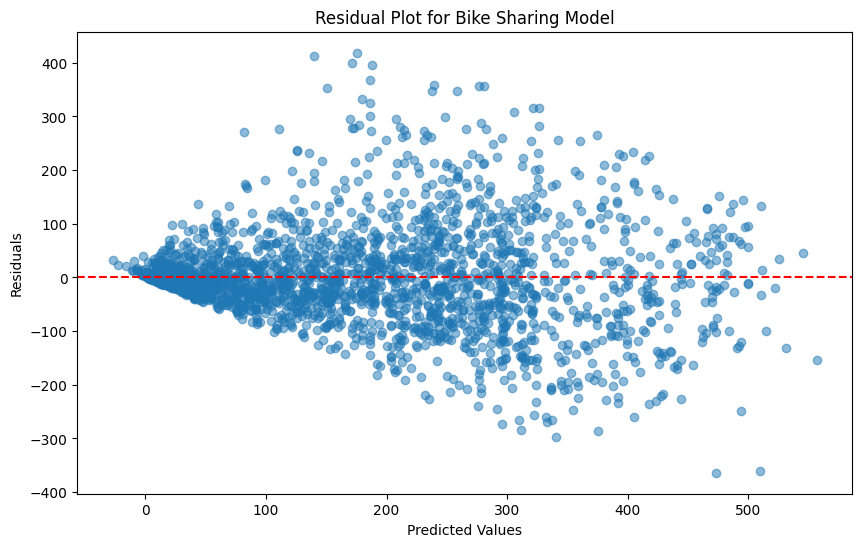

In [69]:
# Visualisasi residual
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Bike Sharing Model')
plt.show()


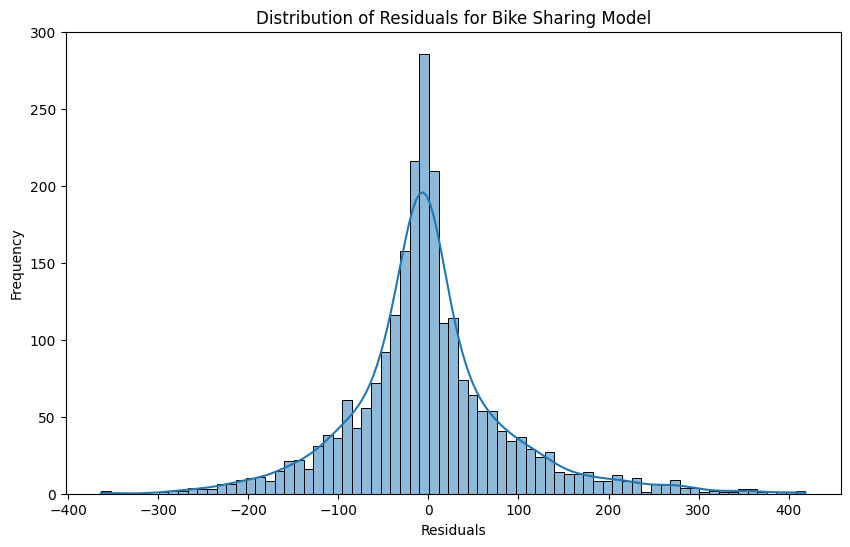

In [70]:
# Histogram residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals for Bike Sharing Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Berdasarkan dua visualisasi residual berikut analisanya:

1. Residual Plot:
  
  Plot residual menunjukkan pola yang melebar secara vertikal seiring dengan kenaikan nilai prediksi. Hal ini mengindikasikan adanya heteroskedastisitas, di mana varians residual tidak konstan sepanjang nilai prediksi. Heteroskedastisitas dapat menyebabkan model menjadi kurang akurat dalam memprediksi pada berbagai level output.
  Implikasi: Model mungkin perlu ditingkatkan dengan memperbaiki teknik pemodelan atau melakukan transformasi terhadap variabel tertentu untuk mengurangi ketidakstabilan varians residual.

2. Distribusi Residual:

  Histogram menunjukkan distribusi residual yang agak simetris di sekitar nol, tetapi dengan ekor panjang di kedua sisi (terutama ke kanan). Ini mengindikasikan bahwa residual berdistribusi tidak sepenuhnya normal dan menunjukkan adanya beberapa outliers yang signifikan.
  Implikasi: Meskipun sebagian besar residual berkisar di sekitar nol, adanya outliers yang besar mungkin menunjukkan bahwa model belum optimal dalam menangani beberapa data, mungkin karena adanya fitur yang tidak cukup terwakili dalam model atau transformasi fitur yang belum sesuai.

**Kesimpulan:**
- Heteroskedastisitas dalam residual plot menunjukkan bahwa model mungkin tidak sesuai untuk seluruh rentang data, terutama di nilai prediksi yang lebih tinggi.
- Distribusi residual yang tidak sepenuhnya normal, meski cenderung simetris, mengindikasikan adanya beberapa outliers yang perlu dianalisis lebih lanjut atau mungkin model perlu disesuaikan dengan menggunakan metode yang lebih robust terhadap outliers.
- Beberapa perbaikan yang dapat dicoba termasuk transformasi variabel, menggunakan model yang lebih kompleks, atau melakukan regularisasi tambahan pada model.

## Estimasi Keuntungan

Dalam menghitung keuntungan sepeda dalam konteks project bike-sharing, RMSE akan menjadi metrik yang lebih baik dibandingkan MAE. Alasannya adalah karena RMSE menghukum kesalahan besar lebih berat, sehingga lebih relevan dalam mengukur potensi kerugian atau keuntungan dari prediksi yang lebih tepat. Berikut adalah beberapa alasan mengapa RMSE lebih tepat dalam kasus ini:

1. Kesalahan Besar Lebih Berdampak pada Keuntungan Operasional:
Misalnya, memprediksi terlalu rendah akan menyebabkan kekurangan sepeda, sementara memprediksi terlalu tinggi akan menyebabkan kelebihan sepeda di stasiun tertentu.RMSE lebih memperhatikan outliers atau kesalahan yang signifikan karena menghitung kuadrat dari kesalahan.

2. RMSE Lebih Sensitif Terhadap Variabilitas dalam Prediksi:
MAE menghitung rata-rata kesalahan absolut tanpa mempertimbangkan seberapa besar kesalahan tersebut. Ini berarti MAE memberikan nilai yang sama untuk semua kesalahan, terlepas dari apakah kesalahan itu besar atau kecil. Dalam hal pengelolaan stok sepeda, kesalahan besar lebih merugikan daripada kesalahan kecil. RMSE menangkap aspek ini, sehingga lebih relevan untuk menghitung potensi keuntungan dari penurunan kesalahan prediksi.

3. Penggunaan RMSE untuk Menghitung Potensi Keuntungan:
Dengan menurunkan RMSE, akan mengurangi potensi kerugian besar yang bisa terjadi dari kesalahan prediksi. Hal ini penting untuk mengoptimalkan ketersediaan sepeda dan alokasi sumber daya di berbagai stasiun, sehingga operasi menjadi lebih efisien.


In [71]:
# Evaluasi Metric Rule Based
df0

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Eksperimen
0,Rule Based,537.607398,426.249294,686.083213,455.919953,Rule Based


In [72]:
# Evaluasi Metric Model Terbaik dan Setelah di Tuning
score_after_tuning

,MAE,RMSE
XGB,59.157749,85.707028


### Keuntungan Jumlah Sepeda Tersewa

In [73]:
# Menghitung selisih RMSE based model dan setelah di tuning
rmse_diff = df0['Mean_RMSE'].mean() - score_after_tuning['RMSE']
rmse_diff

,RMSE
XGB,600.376185


**Dari hasil di atas dapat disimpulkan bahwa adanya peningkatan benefit sebesar 600 unit sepeda yang disewa setelah dilakukan pemodelan dengan Machine Learning**

### Keuntungan Biaya Sewa

Dalam Hal ini diestimasikan keuntungan biaya sewa satu unit sepeda bernilai $100, maka dapat dihitung peningkatan keuntungan setelah dilakukan pemodelan dengan Machine Learning.

In [74]:
# Menghitung Keuntungan Biaya Sewa setelah dilakukan Pemodelan Machine Learning
benefit = rmse_diff * 100
benefit

print(f"Benefit = {benefit.round(2)}")

Benefit = XGB    60037.62
Name: RMSE, dtype: float64


**Dari hasil di atas dapat disimpulkan bahwa adanya peningkatan benefit sebesar $60.037,62 setelah dilakukan pemodelan dengan Machine Learning**

# Kesimpulan dan Rekomendasi

## Kesimpulan

**1. Model Terbaik yang Digunakan:** Model terbaik yang digunakan dalam analisis ini adalah XGBoost, yang merupakan algoritma pembelajaran mesin berbasis pohon keputusan yang dikenal dengan performa yang sangat baik dalam prediksi.

**2. Hyperparameter yang Digunakan**: Random Search, Hyperparameter yang dioptimalkan untuk model XGBoost mencakup:
- subsample: 0.6
- reg_alpha: 0.001
- n_estimators: 190
- max_depth: 5
- learning_rate: 0.04
- gamma: 9
- colsample_bytree: 0.9

**3. Akurasi Model**: Setelah dilakukan tuning hyperparameter, model XGBoost menghasilkan RMSE sebesar 85.71 dan MAE sebesar 59.16, yang menunjukkan peningkatan signifikan dibandingkan rule based model (RMSE 686,083 dan MAE 537,61).

**4. Keuntungan Menggunakan Machine Learning**: Dengan menggunakan model machine learning, keuntungan biaya sewa diperkirakan meningkat sebesar $60.037,62. Ini menunjukkan bahwa pendekatan ini dapat memberikan peningkatan keuntungan yang signifikan dalam melakukan prediksi sepeda sewaan.



## Rekomendasi untuk model

**1. Kekurangan Model**

  - Meskipun XGBoost menunjukkan hasil yang baik, model ini mungkin masih terpengaruh oleh outliers dan ketidaknormalan dalam distribusi data. Selain itu, kompleksitas model dapat menyulitkan interpretasi hasil secara langsung.
  
  - Pengembangan lebih lanjut dapat mencakup eksplorasi model lain seperti Random Forest atau Neural Networks untuk membandingkan performa dan meningkatkan akurasi.

**2. Pengembangan Model ke Depan**

  - Pertimbangkan untuk mengintegrasikan fitur baru, seperti data cuaca lebih rinci, lokasi geografis pengguna, dan pola penggunaan berdasarkan waktu.
  - Penelitian lebih lanjut tentang pengaruh interaksi antar fitur juga bisa menjadi fokus utama untuk meningkatkan akurasi model.

## Rekomendasi untuk Bisnis


**1. Fokus pada Feature Importances**
- Berdasarkan hasil analisis feature importances, beberapa fitur menunjukkan dampak yang signifikan terhadap jumlah penyewaan sepeda. Misalnya, suhu dan jam (hr) memiliki pengaruh besar. Oleh karena itu, bisnis sebaiknya memfokuskan strategi pemasaran pada periode-periode dengan suhu optimal dan jumlah jam sewa tertinggi.

**2. Strategi Pemasaran dan Penawaran**
- Mengembangkan program promosi pada hari-hari dengan cuaca yang mendukung dan selama jam sibuk untuk meningkatkan pemanfaatan sepeda.
- Pertimbangkan untuk menawarkan diskon atau paket sewa di saat cuaca buruk untuk menjaga arus kas.

**3. Peningkatan Layanan Pelanggan**
- Untuk meningkatkan pengalaman pengguna, fokus pada edukasi pengguna tentang penggunaan sepeda selama musim tertentu dan bagaimana cuaca mempengaruhi penggunaan.
- Sediakan informasi real-time mengenai ketersediaan sepeda dan kondisi cuaca.

# SAVE MODEL

In [75]:
import pickle

# save model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('model.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(X)

array([307.3818   ,  10.880021 , 115.826935 , ...,  12.7395525,
        17.276936 , 464.71164  ], dtype=float32)